# 使用说明中文版

## 程序包的简介

该程序包的作用是用于寻找一维光子晶体平板中的BIC，您只需要给出光子晶体的光学参数，并且指定一个特殊的$q-\omega$空间或者$k_y-\omega$空间，我们就能够帮你找到这个空间中的BIC。

该程序用到了几个常用的包：numpy, matplotlib, copy


## 使用步骤——第二个案例
当您想寻找$q=0$情况下的BIC时（这个时候，我们其实是引入了第三个方向的波矢，得考虑混合偏振，单一偏振的模式请参考说明书1），必须导入如下的模块：

In [2]:
from bicky.crystalandnumber import PhotonicCrystalSlab, EssentialNumber
from bicky.bicsearch import FindBICsMix

- crystalandnumber中的PhotonicCrystalSlab是用于构造光子晶体（平板）的
- crystalandnumber中的EssentialNumber是用于指定搜寻BIC的$k_y-\omega$空间的
- bicky中的FindBICsMIX就是用来寻找BIC的(因为存在ky，所以是混合偏振)

我们希望通过改变厚度，来寻找光子晶体平板中TE偏振的BIC，我们设一维光子晶体的介电常数分别为1和4.9（高斯制），两者各占一半（即填充率为0.5），进行如下操作可以生成我们希望得到的光子晶体：

In [3]:
fr = 0.5 # 填充率
ep = [1.0, 4.9] # 两种介电常数
phcs = PhotonicCrystalSlab(ep, fr) # 生成光子晶体平板，默认的厚度和周期都为1，调整周期的大小没有意义，因为之后的长度单位都是以周期为单位的

我们可以通过使用如下的方法，查看光子晶体在一个周期内的空间分布

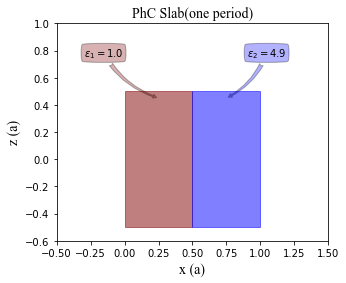

In [4]:
phcs.show()

接下来，您需要指定搜寻BIC的$k_y-\omega$空间，指定的方式就是告诉这个程序你想找的BIC在相应的$k_y-\omega$空间，每种偏振模式有多少个辐射通道

In [5]:
n_radiation_channel = 1 # 辐射通道的个数
num = EssentialNumber(n_radiation=n_radiation_channel) # 创建一个“必要数字”的实例，这是划分区域的关键

在开始搜寻之前，还有最后一步，就是指定偏振模式，这里我们是混合偏振，所以在最开始导入BIC搜寻器的类的时候我们导入的是混合模式的搜寻器，即FindBICMix，所以我们可以直接构建一个BIC搜寻器的实例：

In [7]:
q=0
fb = FindBICsMix(phcs, num, q) # 由光子晶体、划分的区域以及q=0构建的BIC搜寻器

初始化需要耗时8s的样子，请耐心等待一会儿，接下来您需要计算实现相干全反射时的反射相位，反射相位的计算是为后面变参数寻找BIC服务的：

In [8]:
 fb.getcoeffs() # 将反射相位记录到内存中

12585


/Users/xiechongwu/Documents/findingBIC/bicky/boundryconditionwithcTIR.py:140: RuntimeWarning: invalid value encountered in cdouble_scalars
  real_coeffs_ratio = [coefficents[i] / coefficents[i+1]


反射相位的计算需要耗时15s的样子，请耐心等待一会儿，这里提示的警告对程序没有任何影响，之后我们会修复这个。现在我们通过改变光子晶体平板的厚度参数来寻找BIC：

In [9]:
hstart = 1.0 # 厚度的下限
hend = 5.0 # 厚度的上限
Nh = 50 # 遍历厚度的个数
fb.run(hstart, hend, Nh=Nh) # 让我们开始寻找吧!

当遍历的个数不是很多的时候，寻找花费的时间几乎可以忽略掉，现在，您可以读取该程序寻找到的BIC：

In [13]:
bic_ky = fb.bic_kys # BICs' ky, in unit 2*Pi/a
bic_k0 = fb.bic_k0s # BICs' wave number, in unit 2*Pi/a
bic_h = fb.bic_hs # BICs' thickness, in unit a

这里我们随便给一个厚度对应的BIC：

In [15]:
i = 3
print("for thickness: " + str
      (bic_h[i]))
print("==========")
print("ky: ", bic_ky[i])
print("k0: ", bic_k0[i])

for thickness: 1.2448979591836735
ky:  [0.2574999999999996, 0.39249999999999885, 0.5124999999999982, 0.5199999999999981]
k0:  [0.6036034420904035, 0.706618517467288, 0.756869773748695, 0.7593823365627653]


这说明对于这样的一个厚度，它在相应的$k_y-\omega$空间找到四个BIC，我们需要注意一下单位，厚度的单位是 $a$，$k_y$ 的单位是 $2\pi/a$, $k_0$ 的单位是 $2\pi/a$($k_0=\omega/c$，所以可以认为波数$k_0$就代表了频率)。不要忘了，其对应的布洛赫$q=0$，如果您感兴趣，可以试一试$q\neq 0$的情况（并且是混合偏振），看能不能找到BIC。